In [25]:
import pandas as pd
import seaborn as sns
from scipy import stats

pd.set_option('precision', 2)

In [26]:
df = pd.read_csv('data/us-new-york-avg-temp-1895-2018.csv')

In [27]:
df.head()

,Date,Value
0,189501,29.4
1,189601,29.0
2,189701,29.8
3,189801,34.4
4,189901,30.3


In [28]:
df['Anomaly'] = df['Value'] - df['Value'].mean()

In [29]:
df = df.rename(columns={'Value': 'Temperature'})

In [30]:
df.head()

,Date,Temperature,Anomaly
0,189501,29.4,-2.73
1,189601,29.0,-3.13
2,189701,29.8,-2.33
3,189801,34.4,2.27
4,189901,30.3,-1.83


In [31]:
df['Temperature'].describe()

count    124.00
mean      32.13
std        4.45
min       21.60
25%       29.38
50%       32.00
75%       34.88
max       43.30
Name: Temperature, dtype: float64

In [32]:
df['Date'] = df['Date'] // 100

In [33]:
df.head()

,Date,Temperature,Anomaly
0,1895,29.4,-2.73
1,1896,29.0,-3.13
2,1897,29.8,-2.33
3,1898,34.4,2.27
4,1899,30.3,-1.83


In [34]:
regression = stats.linregress(df['Date'], df['Temperature'])

In [35]:
regression.slope, regression.intercept

(0.0143609756097561, 4.03178347757671)

In [36]:
years_to_predict = [1890, 2019, 2020, 2021]

predictions = [regression.slope * year + regression.intercept for year in years_to_predict]

In [37]:
predictions

[31.174027380015737, 33.02659323367428, 33.04095420928403, 33.055315184893786]

In [38]:
sns.set_style('whitegrid')

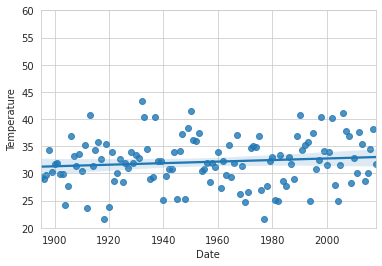

In [39]:
sns.regplot(x=df['Date'], y=df['Temperature']).set_ylim(20, 60)
None

Predicted temperature for 2019, 2020, 2021 is 33.026, 33.04 33.055
The real was 32.6°F, 39.2°F 34.8°F

Lets count MSE

In [40]:
future_predictions = predictions[1:]
real_temperature = [32.6, 39.2, 34.8]

In [41]:
difference = [real - predicted for real, predicted in zip(real_temperature, future_predictions)]
square_difference = [pow(diff, 2) for diff in difference]

In [42]:
sum(square_difference) / len(square_difference)

13.719917314405